In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from lineartree import LinearForestRegressor

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
### UTILITY FUNCTION TO APPLY TRANSFORMATIONS AND GENERATE TARGET ###

def create_target(X, noise=0, add_trend=False):

    if add_trend:
        trend_smooth_lower = np.random.uniform(-1.8,-0.5, X.shape[1])
        trend_smooth_upper = np.random.uniform(0.4,1, X.shape[1])
        trend = np.log(1 + np.exp(2 * np.linspace(trend_smooth_lower, trend_smooth_upper, X.shape[0])))
        trend = pd.DataFrame(trend, columns=X.columns)
        X = X + trend

    y = (
          X['linear_1'] +
          X['linear_2']*3 + 
          (X['notlinear_square'] ** 2)/3 + 
          np.cos(3 * X['notlinear_cos']) + 
          (X['interaction_1'] * X['interaction_2'] * X['interaction_3'])/3
        )
    
    if noise > 0:
        y += np.random.normal(scale=noise, size=X.shape[0])
    
    if add_trend:
        return X, y, trend
    else:
        return X, y

In [3]:
### GENERATE DATA ###

feature_names = [
   'linear_1',
   'linear_2',           
   'notlinear_square',  
   'notlinear_cos',    
   'interaction_1',    
   'interaction_2',    
   'interaction_3',    
   'noise_1',          
   'noise_2',         
   'noise_3',         
   'noise_4',         
   'noise_5'
]

np.random.seed(33)
X = pd.DataFrame(np.random.normal(size=(8_000, len(feature_names))), columns=feature_names)
X, y = create_target(X, noise=2, add_trend=False)
X_trend, y_trend, trend = create_target(X, noise=2, add_trend=True)

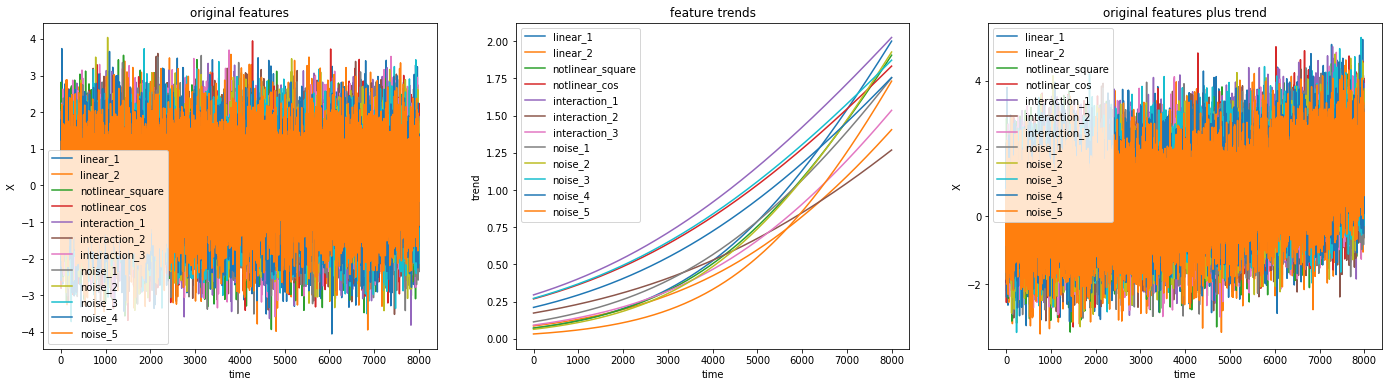

In [4]:
### PLOT SIMULATED DATA ###

plt.figure(figsize=(24,6))

plt.subplot(131)
X.plot(ax=plt.gca()) 
plt.ylabel('X'); plt.xlabel('time'); plt.title('original features')

plt.subplot(132)
trend.plot(ax=plt.gca())
plt.ylabel('trend'); plt.xlabel('time'); plt.title('feature trends')

plt.subplot(133)
X_trend.plot(ax=plt.gca())
plt.ylabel('X'); plt.xlabel('time'); plt.title('original features plus trend')
plt.show()

In [5]:
test_size = [0.6, 0.5, 0.4, 0.3]

results_without_trend = {}
results_with_trend = {}

In [6]:
### FITTING RANDOM FOREST W/O TREND ###

results_without_trend['RandomForest'] = {}

for i in test_size:

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=i)

    model = GridSearchCV(
      RandomForestRegressor(random_state=33),
      param_grid={
          'n_estimators': [50,100,200],
          'max_depth': [5,10,None]
          },
      n_jobs=-1, cv=3,
      scoring='neg_mean_squared_error'
    )
    model.fit(X_train, y_train)

    test_error = mean_squared_error(y_test, model.predict(X_test))
    results_without_trend['RandomForest'][i] = test_error

    print(f'---- {i} test size ----')
    print('BEST PARAMS:', model.best_params_)
    print('TEST ERROR:', test_error)

---- 0.6 test size ----
BEST PARAMS: {'max_depth': 10, 'n_estimators': 200}
TEST ERROR: 4.851329725249528
---- 0.5 test size ----
BEST PARAMS: {'max_depth': 10, 'n_estimators': 200}
TEST ERROR: 4.793690090228054
---- 0.4 test size ----
BEST PARAMS: {'max_depth': 10, 'n_estimators': 200}
TEST ERROR: 4.758825829507583
---- 0.3 test size ----
BEST PARAMS: {'max_depth': 10, 'n_estimators': 200}
TEST ERROR: 4.576642768849584


In [7]:
### FITTING LINEAR REGRESSION W/O TREND ###

results_without_trend['LinearRegression'] = {}

for i in test_size:

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=i)

    model = GridSearchCV(
      Ridge(),
      param_grid={
          'alpha': [1,3,5,7,10],
          },
      n_jobs=-1, cv=3,
      scoring='neg_mean_squared_error'
    )
    model.fit(X_train, y_train)

    test_error = mean_squared_error(y_test, model.predict(X_test))
    results_without_trend['LinearRegression'][i] = test_error

    print(f'---- {i} test size ----')
    print('BEST PARAMS:', model.best_params_)
    print('TEST ERROR:', test_error)

---- 0.6 test size ----
BEST PARAMS: {'alpha': 1}
TEST ERROR: 4.862267130020254
---- 0.5 test size ----
BEST PARAMS: {'alpha': 10}
TEST ERROR: 4.849858944816968
---- 0.4 test size ----
BEST PARAMS: {'alpha': 1}
TEST ERROR: 4.774389071540253
---- 0.3 test size ----
BEST PARAMS: {'alpha': 7}
TEST ERROR: 4.636215639383172


In [8]:
### FITTING LINEAR FOREST W/O TREND ###

results_without_trend['LinearForest'] = {}

for i in test_size:

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=i)

    model = GridSearchCV(
      LinearForestRegressor(Ridge()),
      param_grid={
          'n_estimators': [50,100,200],
          'max_depth': [5,10,None]
          },
      n_jobs=-1, cv=3,
      scoring='neg_mean_squared_error'
    )
    model.fit(X_train, y_train)

    test_error = mean_squared_error(y_test, model.predict(X_test))
    results_without_trend['LinearForest'][i] = test_error

    print(f'---- {i} test size ----')
    print('BEST PARAMS:', model.best_params_)
    print('TEST ERROR:', test_error)

---- 0.6 test size ----
BEST PARAMS: {'max_depth': 5, 'n_estimators': 200}
TEST ERROR: 4.323217786744445
---- 0.5 test size ----
BEST PARAMS: {'max_depth': 5, 'n_estimators': 200}
TEST ERROR: 4.319381508499697
---- 0.4 test size ----
BEST PARAMS: {'max_depth': 5, 'n_estimators': 100}
TEST ERROR: 4.274594977210845
---- 0.3 test size ----
BEST PARAMS: {'max_depth': 5, 'n_estimators': 100}
TEST ERROR: 4.215636891208974


In [9]:
### FITTING RANDOM FOREST W/ TREND ###

results_with_trend['RandomForest'] = {}

for i in test_size:

    results_with_trend['RandomForest']
    X_train, X_test, y_train, y_test = train_test_split(X_trend, y_trend, shuffle=False, test_size=i)

    model = GridSearchCV(
      RandomForestRegressor(random_state=33),
      param_grid={
          'n_estimators': [50,100,200],
          'max_depth': [5,10,None]
          },
      n_jobs=-1, cv=3,
      scoring='neg_mean_squared_error'
    )
    model.fit(X_train, y_train)

    test_error = mean_squared_error(y_test, model.predict(X_test))
    results_with_trend['RandomForest'][i] = test_error

    print(f'---- {i} test size ----')
    print('BEST PARAMS:', model.best_params_)
    print('TEST ERROR:', test_error)

---- 0.6 test size ----
BEST PARAMS: {'max_depth': 10, 'n_estimators': 200}
TEST ERROR: 7.854666984203331
---- 0.5 test size ----
BEST PARAMS: {'max_depth': 10, 'n_estimators': 200}
TEST ERROR: 7.7613937545517455
---- 0.4 test size ----
BEST PARAMS: {'max_depth': 10, 'n_estimators': 200}
TEST ERROR: 7.546342823941518
---- 0.3 test size ----
BEST PARAMS: {'max_depth': 10, 'n_estimators': 200}
TEST ERROR: 7.69495653176793


In [10]:
### FITTING LINEAR REGRESSION W/ TREND ###

results_with_trend['LinearRegression'] = {}

for i in test_size:

    X_train, X_test, y_train, y_test = train_test_split(X_trend, y_trend, shuffle=False, test_size=i)

    model = GridSearchCV(
      Ridge(),
      param_grid={
          'alpha': [1,3,5,7,10],
          },
      n_jobs=-1, cv=3,
      scoring='neg_mean_squared_error'
    )
    model.fit(X_train, y_train)

    test_error = mean_squared_error(y_test, model.predict(X_test))
    results_with_trend['LinearRegression'][i] = test_error

    print(f'---- {i} test size ----')
    print('BEST PARAMS:', model.best_params_)
    print('TEST ERROR:', test_error)

---- 0.6 test size ----
BEST PARAMS: {'alpha': 10}
TEST ERROR: 6.908459517368453
---- 0.5 test size ----
BEST PARAMS: {'alpha': 3}
TEST ERROR: 7.071218773824192
---- 0.4 test size ----
BEST PARAMS: {'alpha': 3}
TEST ERROR: 7.264288640669238
---- 0.3 test size ----
BEST PARAMS: {'alpha': 1}
TEST ERROR: 7.3534751420758315


In [11]:
### FITTING LINEAR FOREST W/ TREND ###

results_with_trend['LinearForest'] = {}

for i in test_size:

    X_train, X_test, y_train, y_test = train_test_split(X_trend, y_trend, shuffle=False, test_size=i)

    model = GridSearchCV(
      LinearForestRegressor(Ridge()),
      param_grid={
          'n_estimators': [50,100,200],
          'max_depth': [5,10,None]
          },
      n_jobs=-1, cv=3,
      scoring='neg_mean_squared_error'
    )
    model.fit(X_train, y_train)

    test_error = mean_squared_error(y_test, model.predict(X_test))
    results_with_trend['LinearForest'][i] = test_error

    print(f'---- {i} test size ----')
    print('BEST PARAMS:', model.best_params_)
    print('TEST ERROR:', test_error)

---- 0.6 test size ----
BEST PARAMS: {'max_depth': 5, 'n_estimators': 100}
TEST ERROR: 5.664596715053012
---- 0.5 test size ----
BEST PARAMS: {'max_depth': 5, 'n_estimators': 50}
TEST ERROR: 5.909603391520009
---- 0.4 test size ----
BEST PARAMS: {'max_depth': 5, 'n_estimators': 200}
TEST ERROR: 5.9466913521014
---- 0.3 test size ----
BEST PARAMS: {'max_depth': 5, 'n_estimators': 200}
TEST ERROR: 5.8955668861978


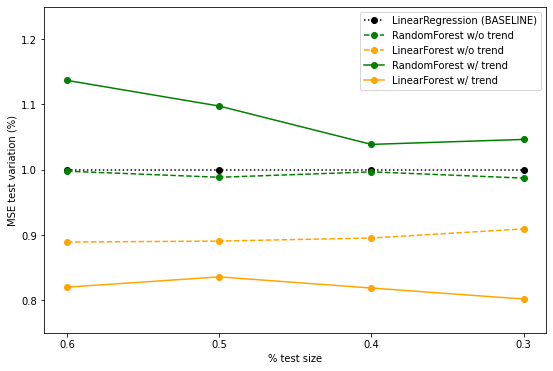

In [12]:
### TEST SET RESULTS ###

plt.figure(figsize=(9,6))
plt.plot([1]*len(test_size), linestyle=':', c='black', marker='o', label='LinearRegression (BASELINE)')

plt.plot(
    [
     e/e_lr for e,e_lr in zip(
         results_without_trend['RandomForest'].values(), 
         results_without_trend['LinearRegression'].values()
        )
    ], c='green', linestyle='--', marker='o', label='RandomForest w/o trend')
plt.plot(
    [
     e/e_lr for e,e_lr in zip(
         results_without_trend['LinearForest'].values(), 
         results_without_trend['LinearRegression'].values()
        )
    ], c='orange', linestyle='--', marker='o', label='LinearForest w/o trend')

plt.plot(
    [
     e/e_lr for e,e_lr in zip(
         results_with_trend['RandomForest'].values(), 
         results_with_trend['LinearRegression'].values()
        )
    ], c='green', marker='o', label='RandomForest w/ trend')
plt.plot(
    [
     e/e_lr for e,e_lr in zip(
         results_with_trend['LinearForest'].values(), 
         results_with_trend['LinearRegression'].values()
        )
    ], c='orange', marker='o', label='LinearForest w/ trend')

plt.xticks(range(len(test_size)), test_size)
plt.xlabel('% test size'); plt.ylabel('MSE test variation (%)'); plt.legend()
plt.ylim([0.75,1.25])
plt.show()